<a href="https://colab.research.google.com/github/Bksleek/Network-Centrality/blob/main/Network_Centrality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries

In [ ]:
!pip install osmnx networkx matplotlib

import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 3.3 MB/s eta 0:00:00


##Load the street network graph from OpenStreetMap

In [ ]:
place_name = "Kaduna South, Kaduna, Nigeria"
gdf = ox.geocode_to_gdf(place_name)
# Get the graph from the polygon
G = ox.graph_from_polygon(gdf['geometry'].iloc[0], network_type="drive")

In [ ]:
print("Graph information:")
print(G)

Graph information:
MultiDiGraph with 2199 nodes and 6059 edges


##Calculate degree distribution

In [ ]:
# Get degrees for all nodes
degrees = [val for (node, val) in G.degree()]

In [ ]:
degree_dict = dict(G.degree())
degrees = list(degree_dict.values())

## Plot histogram of degrees

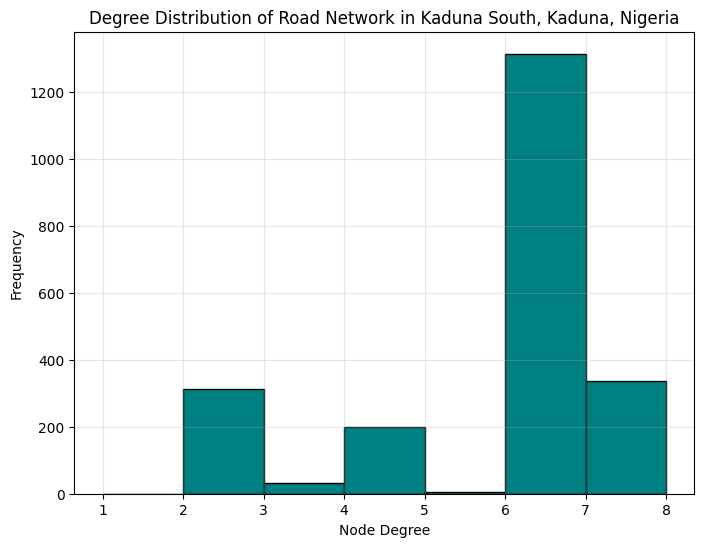

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(degrees, bins=range(1, max(degrees)+1), color='teal', edgecolor='black')
plt.title(f"Degree Distribution of Road Network in {place_name}")
plt.xlabel("Node Degree")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

##Degree Distribution Statistics

In [ ]:
# Degree distribution statistics
import pandas as pd
degree_freq = nx.degree_histogram(G)
degree_df = pd.DataFrame({'Degree': range(len(degree_freq)), 'Frequency': degree_freq})
display(degree_df.head(10))


,Degree,Frequency
0,0,0
1,1,0
2,2,312
3,3,32
4,4,199
5,5,6
6,6,1314
7,7,0
8,8,336


In [ ]:
import numpy as np

print("\nDegree Statistics")
print(f"Number of nodes: {len(G.nodes)}")
print(f"Average degree: {np.mean(degrees):.2f}")
print(f"Maximum degree: {np.max(degrees)}")
print(f"Number of isolated nodes (degree 0): {sum(np.array(degrees) == 0)}")


Degree Statistics
Number of nodes: 2199
Average degree: 5.51
Maximum degree: 8
Number of isolated nodes (degree 0): 0


### Visualizing the graph

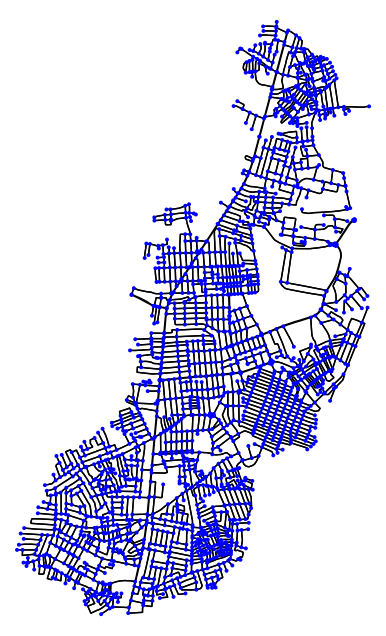

In [ ]:
fig, ax = ox.plot_graph(G, node_size=8, node_color='blue', edge_color='black', bgcolor='white')

##Network centrality plotted for each node

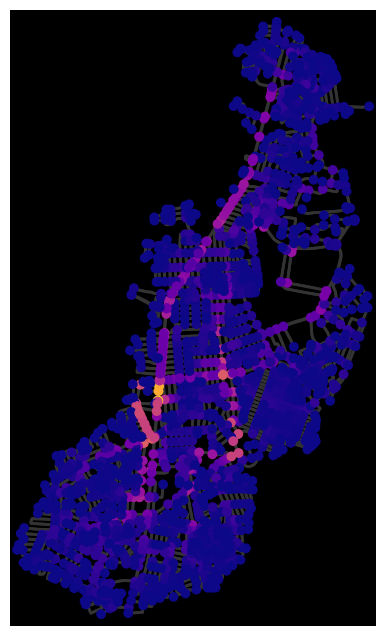

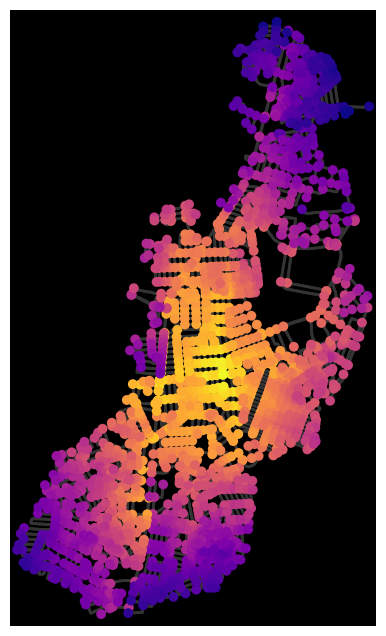

In [ ]:
gdf_nodes, gdf_edges = ox.convert.graph_to_gdfs(G)
G = ox.convert.graph_from_gdfs(gdf_nodes, gdf_edges, graph_attrs=G.graph)

D = ox.convert.to_digraph(G)

bc = nx.betweenness_centrality(D)
nx.set_node_attributes(G, values=bc, name="bc")

nc = ox.plot.get_node_colors_by_attr(G, "bc", cmap="plasma")
fig, ax = ox.plot.plot_graph(
    G, bgcolor="k", node_color=nc, node_size=50, edge_linewidth=2, edge_color="#333333"
)

cc = nx.closeness_centrality(D, distance="travel_time")
nx.set_node_attributes(G, values=cc, name="cc")

nc_cc = ox.plot.get_node_colors_by_attr(G, "cc", cmap="plasma")
fig, ax = ox.plot.plot_graph(
    G, bgcolor="k", node_color=nc_cc, node_size=50, edge_linewidth=2, edge_color="#333333"
)
ox.io.save_graph_geopackage(G, filepath="./graph.gpkg")
ox.io.save_graphml(G, filepath="./graph.graphml")

##hypergraphx Basics  Task 2

##Libraries & Imports

In [ ]:
!pip install hypergraphx
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.2/126.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 2.1 MB/s eta 0:00:00


In [ ]:
import sys
import osmnx as ox

In [ ]:
sys.path.append("..")

from hypergraphx.generation.scale_free import scale_free_hypergraph
from hypergraphx.linalg import *
from hypergraphx.representations.projections import bipartite_projection, clique_projection
from hypergraphx.generation.random import *
from hypergraphx.readwrite.save import save_hypergraph
from hypergraphx.readwrite.load import load_hypergraph
from hypergraphx.viz.draw_hypergraph import draw_hypergraph

In [ ]:
place_name = "Kaduna South, Kaduna, Nigeria"
gdf = ox.geocode_to_gdf(place_name)
G = ox.graph_from_polygon(gdf['geometry'].iloc[0], network_type="drive")

In [ ]:
major_road_name = "Nnamdi Azikwe Way"
edges = [(u, v, k) for u, v, k, data in G.edges(keys=True, data=True) if data.get("name") == major_road_name]

# Collect all unique node endpoints for this road
nodes_on_road = set()
for u, v, k in edges:
    nodes_on_road.add(u)
    nodes_on_road.add(v)
road_hyperedge = tuple(nodes_on_road)

In [ ]:
from hypergraphx.generation.scale_free import Hypergraph
hyperedges_from_segments = [(u, v) for u, v, k in edges]
H = Hypergraph(hyperedges_from_segments)

print(H)

Hypergraph with 115 nodes and 113 edges.
Distribution of hyperedge sizes: {2: 113}


In [ ]:
H.get_edges()

[(1733611836, 2409313178),
 (1733611837, 5253432446),
 (1733611838, 1733612111),
 (1733611867, 1733611891),
 (1733611872, 1733612102),
 (1733611867, 1733611874),
 (1733611876, 1733611948),
 (1733611881, 1733611980),
 (1733611874, 1733611887),
 (1733611891, 5251519005),
 (1733611892, 1733611923),
 (1733611895, 1733612129),
 (1733611896, 1733612132),
 (1733611897, 1733612130),
 (1733611911, 1733612142),
 (1733611892, 1733611912),
 (1733611917, 1733612076),
 (1733611923, 1733611999),
 (1733611934, 1733611967),
 (1733611887, 1733611946),
 (1733611948, 5253359597),
 (1733611951, 5665640822),
 (1733611956, 1733612124),
 (1733611958, 11831296798),
 (1733611838, 1733611967),
 (1733611979, 1733612127),
 (1733611980, 1733612122),
 (1733611983, 1733611995),
 (1733611876, 1733611984),
 (1733611986, 5243681297),
 (1733611995, 1733612048),
 (1733611911, 1733611998),
 (1733611999, 5243681383),
 (1733612010, 1733612153),
 (1733612011, 2409313254),
 (1733612024, 4712449591),
 (1733611951, 1733612028),


In [ ]:
H.get_weights()

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [ ]:
for edge in H:
    print(edge)

((1733611836, 2409313178), 0)
((1733611837, 5253432446), 1)
((1733611838, 1733612111), 2)
((1733611867, 1733611891), 3)
((1733611872, 1733612102), 4)
((1733611867, 1733611874), 5)
((1733611876, 1733611948), 6)
((1733611881, 1733611980), 7)
((1733611874, 1733611887), 8)
((1733611891, 5251519005), 9)
((1733611892, 1733611923), 10)
((1733611895, 1733612129), 11)
((1733611896, 1733612132), 12)
((1733611897, 1733612130), 13)
((1733611911, 1733612142), 14)
((1733611892, 1733611912), 15)
((1733611917, 1733612076), 16)
((1733611923, 1733611999), 17)
((1733611934, 1733611967), 18)
((1733611887, 1733611946), 19)
((1733611948, 5253359597), 20)
((1733611951, 5665640822), 21)
((1733611956, 1733612124), 22)
((1733611958, 11831296798), 23)
((1733611838, 1733611967), 24)
((1733611979, 1733612127), 25)
((1733611980, 1733612122), 26)
((1733611983, 1733611995), 27)
((1733611876, 1733611984), 28)
((1733611986, 5243681297), 29)
((1733611995, 1733612048), 30)
((1733611911, 1733611998), 31)
((1733611999, 524

In [ ]:
segment = (1733611836, 2409313178)
segment_weight = H.get_weight(segment)

In [ ]:
H.get_weight((1733611836, 2409313178))

1

In [ ]:
H.is_connected()

False

In [ ]:
H.add_edge((1733611836, 2409313178), weight=1)

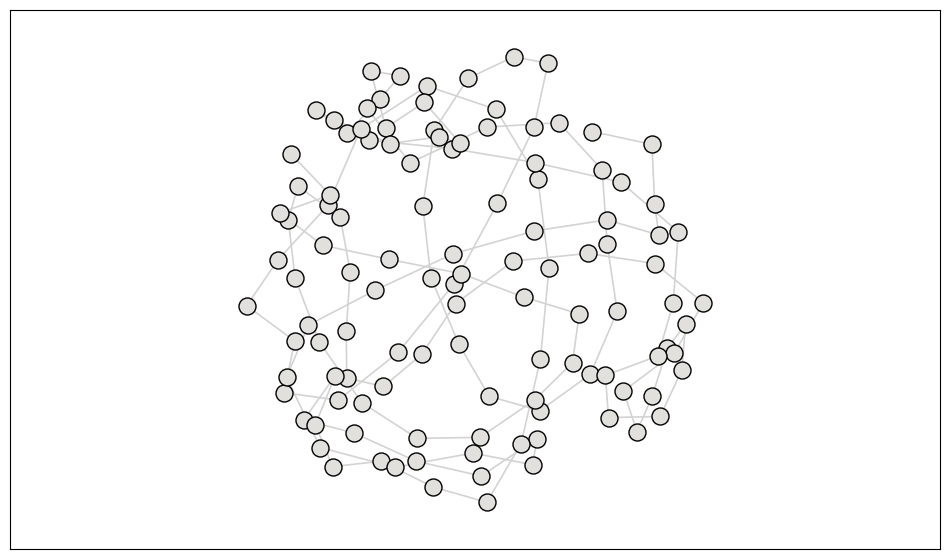

In [ ]:
draw_hypergraph(H)

In [ ]:
H.is_uniform()

True